<a href="https://colab.research.google.com/github/CagdasCankaya/secondHandCar_pricePredict/blob/main/secondHandCar_pricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Library:**

In [ ]:
import tensorflow as tf  #models
import numpy as np
import pandas as pd   #reading and processing dadta
import seaborn as sns #visualization
from tensorflow.keras.layers import Normalization, Dense , InputLayer
from tensorflow.keras.losses import MeanSquaredError , Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



**Data preparation:**

In [ ]:
data = pd.read_csv("train.csv")
data.head()
data.shape

(1000, 12)

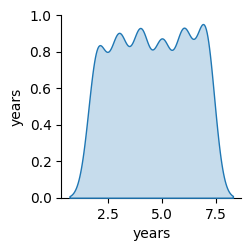

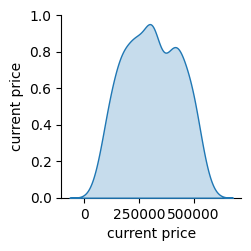

In [ ]:
#sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')
sns.pairplot(data[['years']],diag_kind='kde')
sns.pairplot(data[['current price']],diag_kind='kde')


In [ ]:
tensor_data = tf.constant(data,tf.float16)
print(tensor_data)
print()
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])


tf.Tensor(
[[   1.   inf   inf ...   73.  123.   inf]
 [   2.   inf   inf ...   74.   95.   inf]
 [   3.   inf   inf ...   53.   97.   inf]
 ...
 [ 998.   inf   inf ...  113.   89.   inf]
 [ 999.   inf   inf ...  112.  128.   inf]
 [1000.   inf   inf ...   99.   96.   inf]], shape=(1000, 12), dtype=float16)

tf.Tensor(
[[6.92e+02      inf      inf 7.00e+00      inf 2.00e+00 1.00e+00 1.30e+01
  1.37e+02 8.80e+01 1.17e+02      inf]
 [8.00e+01      inf      inf 4.00e+00      inf 2.00e+00 8.00e+00 1.10e+01
  1.37e+02 5.50e+01 1.40e+02      inf]
 [9.78e+02      inf      inf 7.00e+00 6.11e+04 4.00e+00 4.00e+00 1.40e+01
  1.58e+02 1.19e+02 1.11e+02      inf]
 [5.10e+02      inf      inf 4.00e+00      inf 5.00e+00 1.00e+00 8.00e+00
  1.50e+02 9.50e+01 1.03e+02      inf]
 [6.70e+02      inf      inf 2.00e+00      inf 2.00e+00 3.00e+00 1.10e+01
  1.95e+02 6.00e+01 7.10e+01      inf]], shape=(5, 12), dtype=float16)


In [ ]:
x = tensor_data[:]
print(x.shape)
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=1)
print(y.shape)
print()
print(y[:5])

(1000, 12)
(1000, 1)

tf.Tensor(
[[inf]
 [inf]
 [inf]
 [inf]
 [inf]], shape=(5, 1), dtype=float16)


In [ ]:
normalizer =  tf.keras.layers.Normalization(axis=-1 ,mean=5 ,variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]
                            ])

normalizer(x_normalized) # (x-M)/(sqrt(Variance)) ((x-5)/2)
print()

#column[1] = 3,4 M = 3+4/2 = 3.5  sigma = 3-3.5 && 4-3.5= (+-0.5)
#(x-3.5)/0.5
normalizer = Normalization()
normalizer.adapt(x_normalized)
normalizer(x_normalized)


<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

**Model:**

In [ ]:
model = tf.keras.Sequential(
    [
     InputLayer(input_shape = (5,)),
     normalizer,
     Dense(1),
     ])

model.summary()

#Sequential API
#Functional API


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 5)                 11        
 tion)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 17 (72.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(Dense(1))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliz  (None, 5)                 11        
 ation)                                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 17 (72.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________


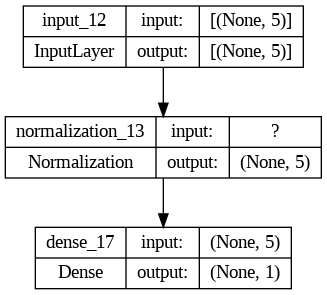

In [ ]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

Epoch 1/10
1/1 [==============================] - 1s 544ms/step - loss: 13.1395
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 13.0616
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 12.9839
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 12.9066
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 12.8297
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 12.7530
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 12.6767
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 12.6007
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 12.5250
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 12.4497

Epoch 1/10
1/1 [==============================] - 0s 11ms/step - loss: 12.3748
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 12.3002
Epoch 3/10
1/1 [==============================] -

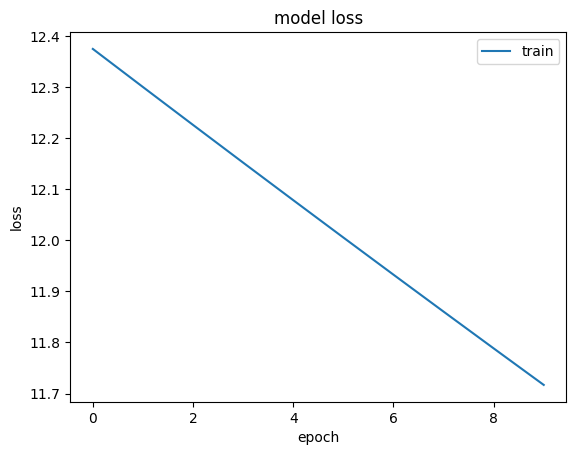

In [ ]:
x= tf.constant(   #2x3 matris
    [
        [1,2,3],
        [4,5,6]
    ]
)

y = tf.constant(
    [
        [1,2,3],
        [0,0,0]
    ]
)
#with sequential model : layers are ordered by sequential.
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(3,input_shape=(3,))] #this  3layer neuron

)

model.compile(optimizer='adam',loss='mse') #
model.fit(x,y,epochs=10,verbose=1) #with fit method we can training our model.
print()
plt.plot(model.fit(x,y,epochs=10,verbose=1).history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

Epoch 1/5
1/1 - 1s - loss: 3.1399 - root_mean_squared_error: 3.4126 - 621ms/epoch - 621ms/step
Epoch 2/5
1/1 - 0s - loss: 8.6615 - root_mean_squared_error: 9.2386 - 10ms/epoch - 10ms/step
Epoch 3/5
1/1 - 0s - loss: 6.5338 - root_mean_squared_error: 7.2523 - 10ms/epoch - 10ms/step
Epoch 4/5
1/1 - 0s - loss: 3.1037 - root_mean_squared_error: 3.8601 - 12ms/epoch - 12ms/step
Epoch 5/5
1/1 - 0s - loss: 4.1346 - root_mean_squared_error: 4.8447 - 13ms/epoch - 13ms/step


AttributeError: module 'matplotlib.pyplot' has no attribute 'pot'

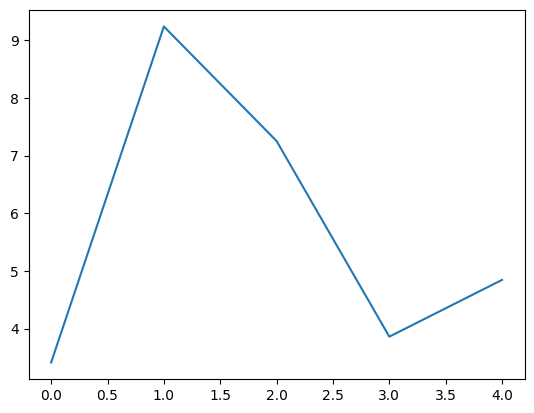

In [ ]:
model.compile(optimizer = Adam(learning_rate=1),
              loss=MeanAbsoluteError(),
              metrics = RootMeanSquaredError())
history = model.fit(x,y,epochs=5,verbose=2)
plt.plot(history.history['root_mean_squared_error'])
print()

model.evaluate(x,y)

(1, 3)
(1, 3)
Epoch 1/10
1/1 [==============================] - 0s 255ms/step - loss: 3.3534 - root_mean_squared_error: 3.3542 - val_loss: 2.7440 - val_root_mean_squared_error: 2.9235
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 2.7440 - root_mean_squared_error: 2.9235 - val_loss: 2.1892 - val_root_mean_squared_error: 2.2646
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 2.1892 - root_mean_squared_error: 2.2646 - val_loss: 1.5551 - val_root_mean_squared_error: 1.7551
Epoch 4/10
1/1 [==============================] - 0s 44ms/step - loss: 1.5551 - root_mean_squared_error: 1.7551 - val_loss: 1.8066 - val_root_mean_squared_error: 1.9751
Epoch 5/10
1/1 [==============================] - 0s 43ms/step - loss: 1.8066 - root_mean_squared_error: 1.9751 - val_loss: 2.3258 - val_root_mean_squared_error: 2.3272
Epoch 6/10
1/1 [==============================] - 0s 59ms/step - loss: 2.3258 - root_mean_squared_error: 2.3272 - val_loss: 1.9782 - val_roo

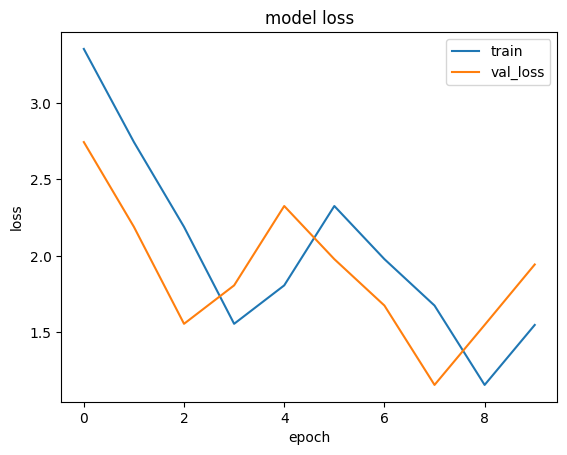

In [ ]:

x = tf.constant(
    [
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ]
)

y = tf.constant(
    [
        [0,0,0],
        [1,5,1],
        [7,4,9]
    ]
)
training_ratio = 0.3
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)
x_train = x[int(dataset_size*training_ratio):int(dataset_size*(training_ratio+val_ratio))]
y_train = y[int(dataset_size*training_ratio):int(dataset_size*(training_ratio+val_ratio))]
print(x_train.shape)
print(y_train.shape)
history = model.fit(x_train,y_train,validation_data=(x_train,y_train),epochs=10,verbose=1)

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])
plt.show()

In [ ]:
model.predict(tf.expand_dims(x_train[0],axis=0))

1/1 [==============================] - 0s 327ms/step


array([[0.9462805 , 0.02613863, 0.67196965]], dtype=float32)

NameError: name 'y_true' is not defined

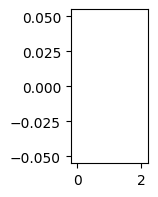

In [ ]:
ind = np.arange(3)
plt.figure(figsize=(1,2))
width=0.2
plt.bar(ind, y_train[0], width, label='Predicted car price')
plt.bar(ind+width,y_true,width,label='Actual car price')
plt.xlabel('Actual vs predicted prices')
plt.ylabel('Car price prices')
plt.show()

In [ ]:
model =  tf.keras.Sequential([
    InputLayer(input_shape=(5,)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu") ,
    Dense(128, activation="relu"),
    Dense(1),
])
model.summary()
#input-hidden-hidden-hidden-output(1)

print()
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)
print()
model.compile(
    optimizer= Adam(learning_rate=0.1),
    loss =MeanAbsoluteError(),
    metrics = RootMeanSquaredError())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 5)                 11        
 tion)                                                           
                                                                 
 dense_55 (Dense)            (None, 128)               768       
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 dense_57 (Dense)            (None, 128)               16512     
                                                                 
 dense_58 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33932 (132.55 KB)
Trainable params: 33921 (132.50 KB)
Non-trainable params: 11 (48.00 Byte)
_____________

In [ ]:

x = tf.constant(
    [
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ]
)

y = tf.constant(
    [
        [0,0,0],
        [1,5,1],
        [7,4,9]
    ]
)
training_ratio = 0.3
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)
x_train = x[int(dataset_size*training_ratio):int(dataset_size*(training_ratio+val_ratio))]
y_train = y[int(dataset_size*training_ratio):int(dataset_size*(training_ratio+val_ratio))]


train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)
for t in train_dataset:
  print(x,y)
  print()
  break


tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32) tf.Tensor(
[[0 0 0]
 [1 5 1]
 [7 4 9]], shape=(3, 3), dtype=int32)


